In [23]:
import numpy as np

def k_means(x, k=3):
    index_list = np.arange(len(x))
    np.random.shuffle(index_list)
    centroids_index = index_list[:k]
    #随机生成三个簇心
    centroids = x[centroids_index]
    y = np.arange(len(x))
    iter_num = 10 #自行设置迭代次数
    for i in range(iter_num):
        y_new = np.arange(len(x))
        for i, xi in enumerate(x):
            y_new[i] = np.argmin([np.linalg.norm(xi-cj) for cj in centroids])
        for j in range(k):
            centroids[j] = np.mean(x[np.where(y_new == j)], axis=0)
        y = y_new.copy()
    return y

if __name__ == '__main__':
    #可自行创造其他数据
    x = np.array([[1,1],[3,3],[1,7],[2,8],[10,20],[1,30],[10,11],[15,18],[12,19]])
    print(k_means(x))

[1 1 1 1 0 2 0 0 0]


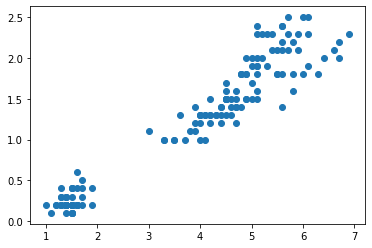

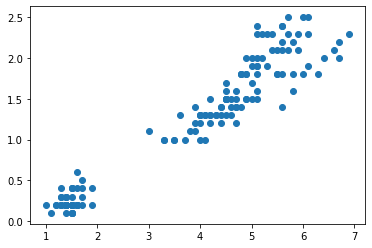

total iterate: 10
method      # of error instances             run_time/s               accuracy/%
K-means           0.0            0.02462148666381836        0.0
hierarchical       13.333333333333332            0.0004906415939331055         0.13333333333333333


In [8]:
import numpy as np
import random
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
np.random.seed()
percentage=0.2
iter=10

def prepare_data():
    iris = datasets.load_iris()
    x = iris.data
    #只取前两个属性进行测试
#     x = x[:,:2]
    #取前三个属性进行测试
#     x = x[:,:3]
    #取后两个属性进行测试
    x = x[:,2:]
    y = iris.target
    
    return x,y

def eva_kmeans(x,y):
    kmean_ei = 0.0
    kmean_rt = 0.0
    kmean_aa = 0.0
    for i in range(0, iter):
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)
        k_begin = time.time() 
        kmeans = KMeans(init="random",algorithm="full", random_state=0,n_clusters=5).fit(x_train,y_train)
        kmeans_pred = kmeans.predict(x_test)
        k_end = time.time() - k_begin
        kmean_rt = kmean_rt + k_end
        accuracy_number = metrics.accuracy_score(y_test, kmeans_pred)*100
        kmean_ei = kmean_ei + accuracy_number
        accuracy_percentage = metrics.accuracy_score(y_test, kmeans_pred)
        kmean_aa = kmean_aa + accuracy_percentage

    kmean_ei = kmean_ei / (iter*1.0)
    kmean_rt = kmean_rt / (iter*1.0)
    kmean_aa = kmean_aa / (iter*1.0)
    plt.scatter(x[:, 0], x[:, 1])
    plt.show()
    return kmean_ei, kmean_rt, kmean_aa

def eva_hierarchical(x,y):
    hier_ei = 0.0
    hier_rt = 0.0
    hier_aa = 0.0
    for i in range(0, 10):
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)
        k_begin = time.time()
        hier = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="complete")
        hier_pred = hier.fit_predict(x_test)
        k_end = time.time() - k_begin
        hier_rt = hier_rt + k_end
        accuracy_number = metrics.accuracy_score(y_test, hier_pred)*100
        hier_ei = hier_ei + accuracy_number 
        accuracy_percentage = metrics.accuracy_score(y_test, hier_pred)
        hier_aa = hier_aa + accuracy_percentage
    hier_ei = hier_ei / (iter*1.0)
    hier_rt = hier_rt / (iter*1.0)
    hier_aa = hier_aa / (iter*1.0)
    plt.scatter(x[:, 0], x[:, 1])
    plt.show()

    return hier_ei, hier_rt, hier_aa

if __name__ == '__main__':
    x,y=prepare_data()
    kmean_ei, kmean_rt, kmean_aa=eva_kmeans(x,y)
    hier_ei, hier_rt, hier_aa = eva_hierarchical(x, y)
    print ("total iterate:",iter)
    print ("method   ",  "  # of error instances     ",  "       run_time/s           ", "   accuracy/%")
    print ("K-means          ",  kmean_ei,    "          ",           kmean_rt,"      ",  kmean_aa)
    print ("hierarchical      ", hier_ei,  "          ", hier_rt, "       ", hier_aa)
    
    
    
    
